## Importing important libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import pyplot
import sklearn
from sklearn import metrics
from sklearn.metrics import mean_absolute_percentage_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_tweedie_deviance
from sklearn.metrics import r2_score
from math import sqrt
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Hide Warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

%config InlineBackend.figure_format='svg' # To create high resolution images

## Reading the csv file

In [4]:
df_train = pd.read_csv(r"C:\Users\User\Desktop\ML Projects\Smart Injection\WI_Train.csv")
df_train.head()

,Date,WI_Rate,UZ_Ann_Pres,MZ_Ann_Pres,LZ_Ann_Pres,UZ_Tub_Pres,MZ_Tub_Pres,LZ_Tub_Pres,UZ_ICV_dP,MZ_ICV_dP,...,MCV_Position,LCV_Position,Annulus_Temp,THT,Annulus_Pressure,THP,Tubing_Dp,Norm_Uzonal_Rate,Norm_Mzonal_Rate,Norm_Lzonal_Rate
0,21/8/2016 4:00,0.0,6350.647461,6466.555664,6471.623047,6358.156250,6464.784668,6543.063477,7.244538,-2.293003,...,10,0,4.003609,4.118267,5210.619335,3321.619600,1888.999735,0.0,0.0,0.0
1,3/9/2016 0:00,0.0,6324.155762,6435.415039,6479.218262,6265.216309,6370.356445,6448.012695,-59.234863,-65.254883,...,0,0,3.946249,4.060938,5472.415482,3456.495235,2015.920247,0.0,0.0,0.0
2,6/9/2016 19:00,0.0,6311.569336,6421.950195,6478.801270,6277.492676,6382.524902,6460.127441,-34.368862,-39.610004,...,0,0,4.057621,4.118267,5494.313759,3455.015806,2039.297953,0.0,0.0,0.0
3,11/1/2017 5:00,0.0,6866.639648,7884.823730,6432.492188,6241.605957,6350.534180,6427.663086,-625.033691,-1534.289551,...,0,10,3.946249,4.060938,6257.163010,3252.424655,3004.738355,0.0,0.0,0.0
4,19/9/2016 20:00,0.0,6245.527344,6350.146973,6458.331543,6244.504883,6348.144043,6425.246094,-1.249884,-2.450925,...,7,0,3.946249,4.060938,5624.745619,3683.659668,1941.085951,0.0,0.0,0.0


In [5]:
df_test = pd.read_csv(r"C:\Users\User\Desktop\ML Projects\Smart Injection\WI_Test.csv")
df_test.head()

,Date,WI_Rate,UZ_Ann_Pres,MZ_Ann_Pres,LZ_Ann_Pres,UZ_Tub_Pres,MZ_Tub_Pres,LZ_Tub_Pres,UZ_ICV_dP,MZ_ICV_dP,...,MCV_Position,LCV_Position,Annulus_Temp,THT,Annulus_Pressure,THP,Tubing_Dp,Norm_Uzonal_Rate,Norm_Mzonal_Rate,Norm_Lzonal_Rate
0,29/12/2016 12:00,3825.695557,6673.719238,7672.870605,6457.536133,7549.300293,7666.192383,7740.737793,875.580750,-6.677987,...,10,0,3.946249,3.946249,5173.296001,4468.951336,704.344666,0.0,3825.695557,0.0
1,22/11/2016 16:00,13349.909180,7447.518555,8826.564453,6497.536621,8733.222656,8837.158203,8912.913086,1285.704102,10.593750,...,10,0,6.704309,20.139788,5441.158884,5670.539354,229.380471,0.0,13349.909180,0.0
2,14/12/2016 1:00,5647.179688,6297.257813,8735.780273,6524.355957,8626.978516,8737.755859,8811.809570,2329.720703,1.975586,...,10,0,6.358098,18.614431,5332.797543,5529.874253,197.076711,0.0,5647.179688,0.0
3,12/9/2016 17:00,0.000000,6285.435059,6393.759277,6471.579590,6292.383301,6397.249512,6474.816895,6.656913,3.320606,...,0,0,3.946249,4.003609,5514.479712,3441.528845,2072.950867,0.0,0.000000,0.0
4,12/1/2017 23:00,0.000000,6698.252441,7791.966797,6547.348145,6356.360840,6465.707031,6543.325195,-341.891602,-1326.259766,...,0,10,3.946249,4.806792,4702.307318,3278.047383,1424.259935,0.0,0.000000,0.0


In [6]:
df_train.set_index(['Date'], inplace = True)

In [7]:
df_test.set_index(['Date'], inplace = True)

### Dropping useless columns

In [8]:
# Define input and output for train data
X_train = df_train.drop(["Norm_Uzonal_Rate", "Norm_Mzonal_Rate", "Norm_Lzonal_Rate"], 1)
y_train = df_train[["Norm_Uzonal_Rate", "Norm_Mzonal_Rate", "Norm_Lzonal_Rate"]]

In [9]:
# Define input and output for test data
X_test = df_test.drop(["Norm_Uzonal_Rate", "Norm_Mzonal_Rate", "Norm_Lzonal_Rate"], 1)
y_test = df_test[["Norm_Uzonal_Rate", "Norm_Mzonal_Rate", "Norm_Lzonal_Rate"]]

In [10]:
X_train.shape

(3390, 21)

In [11]:
X_test.shape

(377, 21)

In [12]:
y_test.shape

(377, 3)

## Using different Regression Models to make predictions

### Ridge regression

In [13]:
from sklearn.linear_model import Ridge
from sklearn import metrics

In [14]:
# Ridge Regression
ridge = Ridge() 
ridge.fit(X_train, y_train)

# evaluate the model
yridge = ridge.predict(X_test)

In [15]:
# Evaluate model predictions

ridge_score_train = ridge.score(X_train, y_train)
ridge_score_test = ridge.score(X_test, y_test)
ridge_mae = metrics.mean_absolute_error(y_test, yridge)
ridge_mse = metrics.mean_squared_error(y_test, yridge)
ridge_rmse = np.sqrt(metrics.mean_squared_error(y_test, yridge))
print('Accuracy of train data:',ridge_score_train)
print('Accuracy of test data:' ,ridge_score_test)
print('Mean Absolute Error:', ridge_mae)  
print('Mean Squared Error:', ridge_mse)  
print('Root Mean Squared Error:', ridge_rmse)

Accuracy of train data: 0.8046933324843072
Accuracy of test data: 0.7521484579617733
Mean Absolute Error: 3403.559775132047
Mean Squared Error: 38509153.517603725
Root Mean Squared Error: 6205.5743906268435


In [16]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

ridger = OLS(y_test, add_constant(yridge)).fit()
print('AIC:', ridger.aic)

AIC: 8047.740490428838


### Lasso regression

In [17]:
from sklearn.linear_model import Lasso

In [18]:
# Lasso Regression
lasso = Lasso() 
lasso.fit(X_train, y_train) 

# evaluate the model
ylasso = lasso.predict(X_test)

In [19]:
# Evaluate model predictions

lasso_score_train = lasso.score(X_train, y_train)
lasso_score_test = lasso.score(X_test, y_test)
lasso_mae = metrics.mean_absolute_error(y_test, ylasso)
lasso_mse = metrics.mean_squared_error(y_test, ylasso)
lasso_rmse = np.sqrt(metrics.mean_squared_error(y_test, ylasso))
print('Accuracy of train data:',lasso_score_train)
print('Accuracy of test data:' ,lasso_score_test)
print('Mean Absolute Error:', lasso_mae)  
print('Mean Squared Error:', lasso_mse)  
print('Root Mean Squared Error:', lasso_rmse)

Accuracy of train data: 0.7882645938589241
Accuracy of test data: 0.7261504509762227
Mean Absolute Error: 3583.5214853937473
Mean Squared Error: 41348668.61225464
Root Mean Squared Error: 6430.293042486838


In [20]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

lassor = OLS(y_test, add_constant(ylasso)).fit()
print('AIC:', lassor.aic)

AIC: 8077.033782014085


### Bagging

In [21]:
from sklearn.ensemble import BaggingRegressor


Bag = BaggingRegressor()
Bag.fit(X_train, y_train)

# evaluate the model
yBag = Bag.predict(X_test)

In [22]:
# Evaluate model predictions

Bag_score_train = Bag.score(X_train, y_train)
Bag_score_test = Bag.score(X_test, y_test)
Bag_mae = metrics.mean_absolute_error(y_test, yBag)
Bag_mse = metrics.mean_squared_error(y_test, yBag)
Bag_rmse = np.sqrt(metrics.mean_squared_error(y_test, yBag))
print('Accuracy of train data:',Bag_score_train)
print('Accuracy of test data:' ,Bag_score_test)
print('Mean Absolute Error:', Bag_mae)  
print('Mean Squared Error:', Bag_mse)  
print('Root Mean Squared Error:', Bag_rmse)

Accuracy of train data: 0.9994469761656123
Accuracy of test data: 0.9953844251341012
Mean Absolute Error: 185.6513166306651
Mean Squared Error: 7301093.413591198
Root Mean Squared Error: 2702.053554908044


In [23]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

BagR = OLS(y_test, add_constant(yBag)).fit()
print('AIC:', BagR.aic)

AIC: 7294.319421640503


### 6.4. Decision tree regression

In [24]:
from sklearn.tree import DecisionTreeRegressor

In [25]:
# Decision Tree Regression
tree = DecisionTreeRegressor()
tree.fit(X_train, y_train)

# evaluate the model
ytree = tree.predict(X_test)

In [26]:
# Evaluate model predictions

tree_score_train = tree.score(X_train, y_train)
tree_score_test = tree.score(X_test, y_test)
tree_mae = metrics.mean_absolute_error(y_test, ytree)
tree_mse = metrics.mean_squared_error(y_test, ytree)
tree_rmse = np.sqrt(metrics.mean_squared_error(y_test, ytree))
print('Accuracy of train data:',tree_score_train)
print('Accuracy of test data:' ,tree_score_test)
print('Mean Absolute Error:', tree_mae)  
print('Mean Squared Error:', tree_mse)  
print('Root Mean Squared Error:', tree_rmse)

Accuracy of train data: 1.0
Accuracy of test data: 0.9958990229111201
Mean Absolute Error: 194.5780815655783
Mean Squared Error: 6339620.943667312
Root Mean Squared Error: 2517.8603900270787


In [27]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

treer = OLS(y_test, add_constant(ytree)).fit()
print('AIC:', treer.aic)

AIC: 7396.4892168780025


### 6.5. Random forest regression

In [28]:
from sklearn.ensemble import RandomForestRegressor

In [29]:
# Random Forest Regression
forest = RandomForestRegressor()
forest.fit(X_train, y_train)

# evaluate the model
yforest = forest.predict(X_test)

In [30]:
# Evaluate model predictions

forest_score_train = forest.score(X_train, y_train)
forest_score_test = forest.score(X_test, y_test)
forest_mae = metrics.mean_absolute_error(y_test, yforest)
forest_mse = metrics.mean_squared_error(y_test, yforest)
forest_rmse = np.sqrt(metrics.mean_squared_error(y_test, yforest))
print('Accuracy of train data:',forest_score_train)
print('Accuracy of test data:' ,forest_score_test)
print('Mean Absolute Error:', forest_mae)  
print('Mean Squared Error:', forest_mse)  
print('Root Mean Squared Error:', forest_rmse)

Accuracy of train data: 0.9996014924004689
Accuracy of test data: 0.9983708624072842
Mean Absolute Error: 115.42027319821734
Mean Squared Error: 1858723.502266541
Root Mean Squared Error: 1363.3501026026076


In [31]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

forestr = OLS(y_test, add_constant(yforest)).fit()
print('AIC:', forestr.aic)

AIC: 6899.669713634386


### 6.6. Extra tree regression

In [32]:
from sklearn.ensemble import ExtraTreesRegressor

In [33]:
# Extra Tree Regression
extra = ExtraTreesRegressor()
extra.fit(X_train, y_train)

# evaluate the model
yextra = extra.predict(X_test)

In [34]:
# Evaluate model predictions

extra_score_train = extra.score(X_train, y_train)
extra_score_test = extra.score(X_test, y_test)
extra_mae = metrics.mean_absolute_error(y_test, yextra)
extra_mse = metrics.mean_squared_error(y_test, yextra)
extra_rmse = np.sqrt(metrics.mean_squared_error(y_test, yextra))
print('Accuracy of train data:',extra_score_train)
print('Accuracy of test data:' ,extra_score_test)
print('Mean Absolute Error:', extra_mae)  
print('Mean Squared Error:', extra_mse)  
print('Root Mean Squared Error:', extra_rmse)

Accuracy of train data: 1.0
Accuracy of test data: 0.9981481269959911
Mean Absolute Error: 112.31402388016194
Mean Squared Error: 1806622.9113047558
Root Mean Squared Error: 1344.1067335984728


In [35]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

extrar = OLS(y_test, add_constant(yextra)).fit()
print('AIC:', extrar.aic)

AIC: 6892.695569401381


### KNeighborsRegressor

In [36]:
from sklearn.neighbors import KNeighborsRegressor

In [37]:
# Gradient Boosting Regression
KN = KNeighborsRegressor()

KN.fit(X_train, y_train)

# evaluate the model
yKN = KN.predict(X_test)

In [38]:
# Evaluate model predictions

KN_score_train = KN.score(X_train, y_train)
KN_score_test = KN.score(X_test, y_test)
KN_mae = metrics.mean_absolute_error(y_test, yKN)
KN_mse = metrics.mean_squared_error(y_test, yKN)
KN_rmse = np.sqrt(metrics.mean_squared_error(y_test, yKN))
print('Accuracy of train data:',KN_score_train)
print('Accuracy of test data:' ,KN_score_test)
print('Mean Absolute Error:', KN_mae)  
print('Mean Squared Error:', KN_mse)  
print('Root Mean Squared Error:', KN_rmse)

Accuracy of train data: 0.964608863201677
Accuracy of test data: 0.9875362532549637
Mean Absolute Error: 209.65312890122823
Mean Squared Error: 2405151.9604802206
Root Mean Squared Error: 1550.8552351783903


In [39]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

KNr = OLS(y_test, add_constant(yKN)).fit()
print('AIC:', KNr.aic)

AIC: 7011.701574128905


### 6.7. XGB regression

In [40]:
from xgboost.sklearn import XGBRegressor

In [41]:
# XGBoost Regressor
xgb = XGBRegressor()

xgb.fit(X_train, y_train)

# evaluate the model
yxgb = xgb.predict(X_test)

In [42]:
# Evaluate model predictions

xgb_score_train = xgb.score(X_train, y_train)
xgb_score_test = xgb.score(X_test, y_test)
xgb_mae = metrics.mean_absolute_error(y_test, yxgb)
xgb_mse = metrics.mean_squared_error(y_test, yxgb)
xgb_rmse = np.sqrt(metrics.mean_squared_error(y_test, yxgb))
print('Accuracy of train data:',xgb_score_train)
print('Accuracy of test data:' ,xgb_score_test)
print('Mean Absolute Error:', xgb_mae)  
print('Mean Squared Error:', xgb_mse)  
print('Root Mean Squared Error:', xgb_rmse)

Accuracy of train data: 0.9999964703806349
Accuracy of test data: 0.99643340238344
Mean Absolute Error: 213.90054544607233
Mean Squared Error: 4775156.656783353
Root Mean Squared Error: 2185.2131833721287


In [43]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

xgbr = OLS(y_test, add_constant(yxgb)).fit()
print('AIC:', xgbr.aic)

AIC: 6903.1114338266925


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

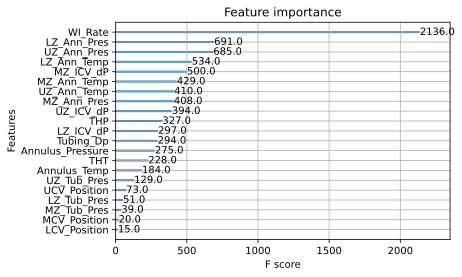

In [44]:
from xgboost import plot_importance
plot_importance(xgb)

In [45]:
summary=pd.DataFrame()
summary['Models'] = ['Ridge Regression', 'Lasso Regression', 'Bagging Regressor', 'Decision Tree',
                     'Random Forest', 'Extra tree Regression', 'KNeighborsRegressor', 'XGBoost']
summary['Train_Score'] = ridge_score_train,lasso_score_train,Bag_score_train,tree_score_train,forest_score_train,extra_score_train,KN_score_train,xgb_score_train
summary['Test_Score'] = ridge_score_test,lasso_score_test,Bag_score_test,tree_score_test,forest_score_test,extra_score_test,KN_score_test,xgb_score_test
summary['AIC'] = ridger.aic, lassor.aic, BagR.aic, treer.aic, forestr.aic, extrar.aic, KNr.aic, xgbr.aic
summary['Mean_Absolute_Error'] = ridge_mae, lasso_mae, Bag_mae, tree_mae, forest_mae, extra_mae, KN_mae, xgb_mae
summary['Root_Mean_Squared_Error'] = ridge_rmse, lasso_rmse, Bag_rmse, tree_rmse, forest_rmse, extra_rmse, KN_rmse, xgb_rmse
summary

,Models,Train_Score,Test_Score,AIC,Mean_Absolute_Error,Root_Mean_Squared_Error
0,Ridge Regression,0.804693,0.752148,8047.740490,3403.559775,6205.574391
1,Lasso Regression,0.788265,0.726150,8077.033782,3583.521485,6430.293042
2,Bagging Regressor,0.999447,0.995384,7294.319422,185.651317,2702.053555
3,Decision Tree,1.000000,0.995899,7396.489217,194.578082,2517.860390
4,Random Forest,0.999601,0.998371,6899.669714,115.420273,1363.350103
5,Extra tree Regression,1.000000,0.998148,6892.695569,112.314024,1344.106734
6,KNeighborsRegressor,0.964609,0.987536,7011.701574,209.653129,1550.855235
7,XGBoost,0.999996,0.996433,6903.111434,213.900545,2185.213183


In [46]:
summary = pd.DataFrame(summary).to_csv('summary.csv')

In [47]:
df_test[['Predicted_Bag_UZ', 'Predicted_Bag_MZ', 'Predicted_Bag_LZ']] = yBag
df_test.head()

,WI_Rate,UZ_Ann_Pres,MZ_Ann_Pres,LZ_Ann_Pres,UZ_Tub_Pres,MZ_Tub_Pres,LZ_Tub_Pres,UZ_ICV_dP,MZ_ICV_dP,LZ_ICV_dP,...,THT,Annulus_Pressure,THP,Tubing_Dp,Norm_Uzonal_Rate,Norm_Mzonal_Rate,Norm_Lzonal_Rate,Predicted_Bag_UZ,Predicted_Bag_MZ,Predicted_Bag_LZ
Date,,,,,,,,,,,,,,,,,,,,,
29/12/2016 12:00,3825.695557,6673.719238,7672.870605,6457.536133,7549.300293,7666.192383,7740.737793,875.580750,-6.677987,1283.201904,...,3.946249,5173.296001,4468.951336,704.344666,0.0,3825.695557,0.0,1815.546349,912.548195,868.74414
22/11/2016 16:00,13349.909180,7447.518555,8826.564453,6497.536621,8733.222656,8837.158203,8912.913086,1285.704102,10.593750,2415.376465,...,20.139788,5441.158884,5670.539354,229.380471,0.0,13349.909180,0.0,0.000000,13421.532424,0.00000
14/12/2016 1:00,5647.179688,6297.257813,8735.780273,6524.355957,8626.978516,8737.755859,8811.809570,2329.720703,1.975586,2287.453613,...,18.614431,5332.797543,5529.874253,197.076711,0.0,5647.179688,0.0,0.000000,5649.370947,0.00000
12/9/2016 17:00,0.000000,6285.435059,6393.759277,6471.579590,6292.383301,6397.249512,6474.816895,6.656913,3.320606,3.316755,...,4.003609,5514.479712,3441.528845,2072.950867,0.0,0.000000,0.0,0.000000,0.000000,0.00000
12/1/2017 23:00,0.000000,6698.252441,7791.966797,6547.348145,6356.360840,6465.707031,6543.325195,-341.891602,-1326.259766,-4.022949,...,4.806792,4702.307318,3278.047383,1424.259935,0.0,0.000000,0.0,0.000000,0.000000,0.00000


In [48]:
df_test[['Predicted_RF_UZ', 'Predicted_RF_MZ', 'Predicted_RF_LZ']] = yforest
df_test.head()

,WI_Rate,UZ_Ann_Pres,MZ_Ann_Pres,LZ_Ann_Pres,UZ_Tub_Pres,MZ_Tub_Pres,LZ_Tub_Pres,UZ_ICV_dP,MZ_ICV_dP,LZ_ICV_dP,...,Tubing_Dp,Norm_Uzonal_Rate,Norm_Mzonal_Rate,Norm_Lzonal_Rate,Predicted_Bag_UZ,Predicted_Bag_MZ,Predicted_Bag_LZ,Predicted_RF_UZ,Predicted_RF_MZ,Predicted_RF_LZ
Date,,,,,,,,,,,,,,,,,,,,,
29/12/2016 12:00,3825.695557,6673.719238,7672.870605,6457.536133,7549.300293,7666.192383,7740.737793,875.580750,-6.677987,1283.201904,...,704.344666,0.0,3825.695557,0.0,1815.546349,912.548195,868.74414,1122.808893,1688.875172,658.315324
22/11/2016 16:00,13349.909180,7447.518555,8826.564453,6497.536621,8733.222656,8837.158203,8912.913086,1285.704102,10.593750,2415.376465,...,229.380471,0.0,13349.909180,0.0,0.000000,13421.532424,0.00000,0.000000,13437.453274,0.000000
14/12/2016 1:00,5647.179688,6297.257813,8735.780273,6524.355957,8626.978516,8737.755859,8811.809570,2329.720703,1.975586,2287.453613,...,197.076711,0.0,5647.179688,0.0,0.000000,5649.370947,0.00000,0.000000,5650.695644,0.000000
12/9/2016 17:00,0.000000,6285.435059,6393.759277,6471.579590,6292.383301,6397.249512,6474.816895,6.656913,3.320606,3.316755,...,2072.950867,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
12/1/2017 23:00,0.000000,6698.252441,7791.966797,6547.348145,6356.360840,6465.707031,6543.325195,-341.891602,-1326.259766,-4.022949,...,1424.259935,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000


In [49]:
df_test[['Predicted_Extra_UZ', 'Predicted_Extra_MZ', 'Predicted_Extra_LZ']] = yextra
df_test.head()

,WI_Rate,UZ_Ann_Pres,MZ_Ann_Pres,LZ_Ann_Pres,UZ_Tub_Pres,MZ_Tub_Pres,LZ_Tub_Pres,UZ_ICV_dP,MZ_ICV_dP,LZ_ICV_dP,...,Norm_Lzonal_Rate,Predicted_Bag_UZ,Predicted_Bag_MZ,Predicted_Bag_LZ,Predicted_RF_UZ,Predicted_RF_MZ,Predicted_RF_LZ,Predicted_Extra_UZ,Predicted_Extra_MZ,Predicted_Extra_LZ
Date,,,,,,,,,,,,,,,,,,,,,
29/12/2016 12:00,3825.695557,6673.719238,7672.870605,6457.536133,7549.300293,7666.192383,7740.737793,875.580750,-6.677987,1283.201904,...,0.0,1815.546349,912.548195,868.74414,1122.808893,1688.875172,658.315324,502.946126,3440.787532,44.422982
22/11/2016 16:00,13349.909180,7447.518555,8826.564453,6497.536621,8733.222656,8837.158203,8912.913086,1285.704102,10.593750,2415.376465,...,0.0,0.000000,13421.532424,0.00000,0.000000,13437.453274,0.000000,0.000000,13370.588948,0.000000
14/12/2016 1:00,5647.179688,6297.257813,8735.780273,6524.355957,8626.978516,8737.755859,8811.809570,2329.720703,1.975586,2287.453613,...,0.0,0.000000,5649.370947,0.00000,0.000000,5650.695644,0.000000,0.000000,5646.824829,0.000000
12/9/2016 17:00,0.000000,6285.435059,6393.759277,6471.579590,6292.383301,6397.249512,6474.816895,6.656913,3.320606,3.316755,...,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12/1/2017 23:00,0.000000,6698.252441,7791.966797,6547.348145,6356.360840,6465.707031,6543.325195,-341.891602,-1326.259766,-4.022949,...,0.0,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [50]:
df_test[['Predicted_KN_UZ', 'Predicted_KN_MZ', 'Predicted_KN_LZ']] = yKN
df_test.head()

,WI_Rate,UZ_Ann_Pres,MZ_Ann_Pres,LZ_Ann_Pres,UZ_Tub_Pres,MZ_Tub_Pres,LZ_Tub_Pres,UZ_ICV_dP,MZ_ICV_dP,LZ_ICV_dP,...,Predicted_Bag_LZ,Predicted_RF_UZ,Predicted_RF_MZ,Predicted_RF_LZ,Predicted_Extra_UZ,Predicted_Extra_MZ,Predicted_Extra_LZ,Predicted_KN_UZ,Predicted_KN_MZ,Predicted_KN_LZ
Date,,,,,,,,,,,,,,,,,,,,,
29/12/2016 12:00,3825.695557,6673.719238,7672.870605,6457.536133,7549.300293,7666.192383,7740.737793,875.580750,-6.677987,1283.201904,...,868.74414,1122.808893,1688.875172,658.315324,502.946126,3440.787532,44.422982,1748.435583,1937.991272,0.0
22/11/2016 16:00,13349.909180,7447.518555,8826.564453,6497.536621,8733.222656,8837.158203,8912.913086,1285.704102,10.593750,2415.376465,...,0.00000,0.000000,13437.453274,0.000000,0.000000,13370.588948,0.000000,0.000000,13468.296096,0.0
14/12/2016 1:00,5647.179688,6297.257813,8735.780273,6524.355957,8626.978516,8737.755859,8811.809570,2329.720703,1.975586,2287.453613,...,0.00000,0.000000,5650.695644,0.000000,0.000000,5646.824829,0.000000,0.000000,5644.177051,0.0
12/9/2016 17:00,0.000000,6285.435059,6393.759277,6471.579590,6292.383301,6397.249512,6474.816895,6.656913,3.320606,3.316755,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
12/1/2017 23:00,0.000000,6698.252441,7791.966797,6547.348145,6356.360840,6465.707031,6543.325195,-341.891602,-1326.259766,-4.022949,...,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0


In [51]:
df_test[['Predicted_DT_UZ', 'Predicted_DT_MZ', 'Predicted_DT_LZ']] = ytree
df_test.head()

,WI_Rate,UZ_Ann_Pres,MZ_Ann_Pres,LZ_Ann_Pres,UZ_Tub_Pres,MZ_Tub_Pres,LZ_Tub_Pres,UZ_ICV_dP,MZ_ICV_dP,LZ_ICV_dP,...,Predicted_RF_LZ,Predicted_Extra_UZ,Predicted_Extra_MZ,Predicted_Extra_LZ,Predicted_KN_UZ,Predicted_KN_MZ,Predicted_KN_LZ,Predicted_DT_UZ,Predicted_DT_MZ,Predicted_DT_LZ
Date,,,,,,,,,,,,,,,,,,,,,
29/12/2016 12:00,3825.695557,6673.719238,7672.870605,6457.536133,7549.300293,7666.192383,7740.737793,875.580750,-6.677987,1283.201904,...,658.315324,502.946126,3440.787532,44.422982,1748.435583,1937.991272,0.0,0.0,0.000000,3216.770264
22/11/2016 16:00,13349.909180,7447.518555,8826.564453,6497.536621,8733.222656,8837.158203,8912.913086,1285.704102,10.593750,2415.376465,...,0.000000,0.000000,13370.588948,0.000000,0.000000,13468.296096,0.0,0.0,13416.509770,0.000000
14/12/2016 1:00,5647.179688,6297.257813,8735.780273,6524.355957,8626.978516,8737.755859,8811.809570,2329.720703,1.975586,2287.453613,...,0.000000,0.000000,5646.824829,0.000000,0.000000,5644.177051,0.0,0.0,5646.992676,0.000000
12/9/2016 17:00,0.000000,6285.435059,6393.759277,6471.579590,6292.383301,6397.249512,6474.816895,6.656913,3.320606,3.316755,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000
12/1/2017 23:00,0.000000,6698.252441,7791.966797,6547.348145,6356.360840,6465.707031,6543.325195,-341.891602,-1326.259766,-4.022949,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000


In [52]:
Predictions = pd.DataFrame(df_test)

In [53]:
Predictions.to_csv('Predictions.csv')

In [54]:
print(__doc__)
from collections import defaultdict
from scipy.stats import spearmanr, kendalltau, pearsonr
from scipy.cluster import hierarchy
from scipy.spatial.distance import squareform
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

Automatically created module for IPython interactive environment


## Feature Importance

In [55]:
# XGBoost Regressor
xgb = XGBRegressor()

xgb.fit(X_train, y_train)

# evaluate the model
yxgb = xgb.predict(X_test)

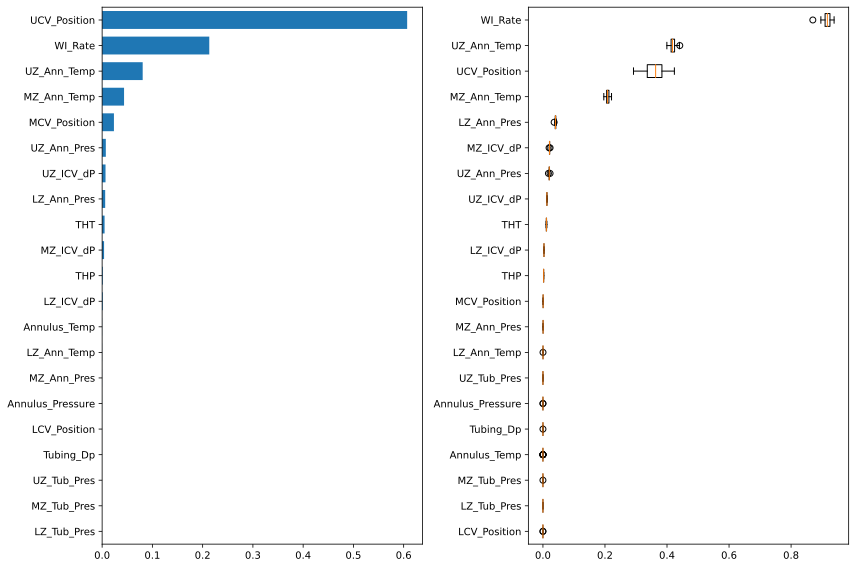

In [56]:
result = permutation_importance(xgb, X_train, y_train, n_repeats=50,
                                random_state=42)
perm_sorted_idx = result.importances_mean.argsort()

tree_importance_sorted_idx = np.argsort(xgb.feature_importances_)
tree_indices = np.arange(0, len(xgb.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
ax1.barh(tree_indices,
         xgb.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(df_train.columns[tree_importance_sorted_idx])
ax1.set_ylim((0, len(xgb.feature_importances_)))
ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X_train.columns[perm_sorted_idx])
fig.tight_layout()
plt.show()

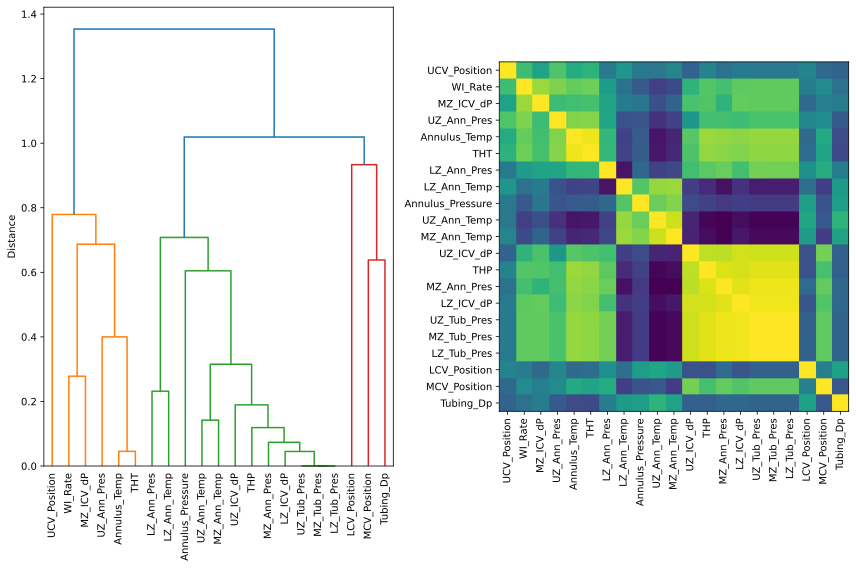

In [57]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))
corr = spearmanr(X_train).correlation

# Ensure the correlation matrix is symmetric
corr = (corr + corr.T)/2
np.fill_diagonal(corr, 1)

# We convert the correlation matrix to a distance matrix before performing
# hierarchical clustering using Ward's linkage.
distance_matrix = 1 - np.abs(corr)
dist_linkage = hierarchy.ward(squareform(distance_matrix))
dendro = hierarchy.dendrogram(dist_linkage, labels=X_train.columns.tolist(), ax=ax1, leaf_rotation=90)
dendro_idx = np.arange(0, len(dendro['ivl']))

ax1.set_ylabel('Distance')
ax2.imshow(corr[dendro['leaves'], :][:, dendro['leaves']])
ax2.set_xticks(dendro_idx)
ax2.set_yticks(dendro_idx)
ax2.set_xticklabels(dendro['ivl'], rotation='vertical')
ax2.set_yticklabels(dendro['ivl'])
fig.tight_layout()
plt.show()

In [58]:
X_train.head()

,WI_Rate,UZ_Ann_Pres,MZ_Ann_Pres,LZ_Ann_Pres,UZ_Tub_Pres,MZ_Tub_Pres,LZ_Tub_Pres,UZ_ICV_dP,MZ_ICV_dP,LZ_ICV_dP,...,MZ_Ann_Temp,LZ_Ann_Temp,UCV_Position,MCV_Position,LCV_Position,Annulus_Temp,THT,Annulus_Pressure,THP,Tubing_Dp
Date,,,,,,,,,,,,,,,,,,,,,
21/8/2016 4:00,0.0,6350.647461,6466.555664,6471.623047,6358.156250,6464.784668,6543.063477,7.244538,-2.293003,70.793533,...,80.066986,76.199348,0.0,10,0,4.003609,4.118267,5210.619335,3321.619600,1888.999735
3/9/2016 0:00,0.0,6324.155762,6435.415039,6479.218262,6265.216309,6370.356445,6448.012695,-59.234863,-65.254883,-31.176758,...,96.720711,96.941322,0.0,0,0,3.946249,4.060938,5472.415482,3456.495235,2015.920247
6/9/2016 19:00,0.0,6311.569336,6421.950195,6478.801270,6277.492676,6382.524902,6460.127441,-34.368862,-39.610004,-18.601282,...,97.572197,98.234093,0.0,0,0,4.057621,4.118267,5494.313759,3455.015806,2039.297953
11/1/2017 5:00,0.0,6866.639648,7884.823730,6432.492188,6241.605957,6350.534180,6427.663086,-625.033691,-1534.289551,-4.829102,...,64.213768,78.906723,0.0,0,10,3.946249,4.060938,6257.163010,3252.424655,3004.738355
19/9/2016 20:00,0.0,6245.527344,6350.146973,6458.331543,6244.504883,6348.144043,6425.246094,-1.249884,-2.450925,-33.020531,...,93.562866,100.002212,7.0,7,0,3.946249,4.060938,5624.745619,3683.659668,1941.085951


In [59]:
X_test.head()

,WI_Rate,UZ_Ann_Pres,MZ_Ann_Pres,LZ_Ann_Pres,UZ_Tub_Pres,MZ_Tub_Pres,LZ_Tub_Pres,UZ_ICV_dP,MZ_ICV_dP,LZ_ICV_dP,...,MZ_Ann_Temp,LZ_Ann_Temp,UCV_Position,MCV_Position,LCV_Position,Annulus_Temp,THT,Annulus_Pressure,THP,Tubing_Dp
Date,,,,,,,,,,,,,,,,,,,,,
29/12/2016 12:00,3825.695557,6673.719238,7672.870605,6457.536133,7549.300293,7666.192383,7740.737793,875.580750,-6.677987,1283.201904,...,69.271576,83.353058,0,10,0,3.946249,3.946249,5173.296001,4468.951336,704.344666
22/11/2016 16:00,13349.909180,7447.518555,8826.564453,6497.536621,8733.222656,8837.158203,8912.913086,1285.704102,10.593750,2415.376465,...,29.958944,72.291191,0,10,0,6.704309,20.139788,5441.158884,5670.539354,229.380471
14/12/2016 1:00,5647.179688,6297.257813,8735.780273,6524.355957,8626.978516,8737.755859,8811.809570,2329.720703,1.975586,2287.453613,...,30.061424,76.283607,0,10,0,6.358098,18.614431,5332.797543,5529.874253,197.076711
12/9/2016 17:00,0.000000,6285.435059,6393.759277,6471.579590,6292.383301,6397.249512,6474.816895,6.656913,3.320606,3.316755,...,98.346451,99.296753,0,0,0,3.946249,4.003609,5514.479712,3441.528845,2072.950867
12/1/2017 23:00,0.000000,6698.252441,7791.966797,6547.348145,6356.360840,6465.707031,6543.325195,-341.891602,-1326.259766,-4.022949,...,55.543148,63.414837,0,0,10,3.946249,4.806792,4702.307318,3278.047383,1424.259935


In [60]:
from sklearn.ensemble import RandomForestRegressor

# Fit the regressor
rf_reg = RandomForestRegressor().fit(X_train, y_train)

# Print the mean accuracy achieved by the regressor on the test set
rf_reg.score(X_test, y_test)

0.9981733860170906

In [61]:
from sklearn.inspection import permutation_importance

def feature_importance(reg, X, y, top_limit=None):

  # Retrieve the Bunch object after 50 repeats
  # n_repeats is the number of times that each feature was permuted to compute the final score
  bunch = permutation_importance(reg, X, y,
                                 n_repeats=50, random_state=42)

  # Average feature importance
  imp_means = bunch.importances_mean

  # List that contains the index of each feature in descending order of importance
  ordered_imp_means_args = np.argsort(imp_means)[::-1]

  # If no limit print all features
  if top_limit is None:
    top_limit = len(ordered_imp_means_args)

  # Print relevant information
  for i, _ in zip(ordered_imp_means_args, range(top_limit)):
    name = df_train.columns[i]
    imp_score = imp_means[i]
    imp_std = bunch.importances_std[i]
    print(f"Feature {name} with index {i} has an average importance score of {imp_score:.3f} +/- {imp_std:.3f}\n")

In [62]:
feature_importance(rf_reg, X_train, y_train)

Feature WI_Rate with index 0 has an average importance score of 1.303 +/- 0.024

Feature MCV_Position with index 14 has an average importance score of 0.265 +/- 0.009

Feature UCV_Position with index 13 has an average importance score of 0.093 +/- 0.007

Feature UZ_Ann_Temp with index 10 has an average importance score of 0.058 +/- 0.001

Feature LCV_Position with index 15 has an average importance score of 0.056 +/- 0.005

Feature LZ_Ann_Pres with index 3 has an average importance score of 0.032 +/- 0.001

Feature LZ_Ann_Temp with index 12 has an average importance score of 0.028 +/- 0.001

Feature MZ_Ann_Temp with index 11 has an average importance score of 0.025 +/- 0.000

Feature LZ_ICV_dP with index 9 has an average importance score of 0.008 +/- 0.001

Feature MZ_ICV_dP with index 8 has an average importance score of 0.004 +/- 0.000

Feature UZ_ICV_dP with index 7 has an average importance score of 0.003 +/- 0.000

Feature Tubing_Dp with index 20 has an average importance score of

In [63]:
feature_importance(rf_reg, X_test, y_test)

Feature WI_Rate with index 0 has an average importance score of 1.441 +/- 0.087

Feature MCV_Position with index 14 has an average importance score of 0.293 +/- 0.028

Feature UCV_Position with index 13 has an average importance score of 0.092 +/- 0.019

Feature UZ_Ann_Temp with index 10 has an average importance score of 0.069 +/- 0.005

Feature LCV_Position with index 15 has an average importance score of 0.049 +/- 0.027

Feature LZ_Ann_Pres with index 3 has an average importance score of 0.036 +/- 0.004

Feature LZ_Ann_Temp with index 12 has an average importance score of 0.034 +/- 0.002

Feature MZ_Ann_Temp with index 11 has an average importance score of 0.031 +/- 0.002

Feature LZ_ICV_dP with index 9 has an average importance score of 0.010 +/- 0.002

Feature UZ_ICV_dP with index 7 has an average importance score of 0.004 +/- 0.001

Feature MZ_ICV_dP with index 8 has an average importance score of 0.004 +/- 0.000

Feature Tubing_Dp with index 20 has an average importance score of

In [64]:
print("On TRAIN split:\n")
feature_importance(rf_reg, X_train, y_train, top_limit=20)

print("\nOn TEST split:\n")
feature_importance(rf_reg, X_test, y_test, top_limit=20)

On TRAIN split:

Feature WI_Rate with index 0 has an average importance score of 1.303 +/- 0.024

Feature MCV_Position with index 14 has an average importance score of 0.265 +/- 0.009

Feature UCV_Position with index 13 has an average importance score of 0.093 +/- 0.007

Feature UZ_Ann_Temp with index 10 has an average importance score of 0.058 +/- 0.001

Feature LCV_Position with index 15 has an average importance score of 0.056 +/- 0.005

Feature LZ_Ann_Pres with index 3 has an average importance score of 0.032 +/- 0.001

Feature LZ_Ann_Temp with index 12 has an average importance score of 0.028 +/- 0.001

Feature MZ_Ann_Temp with index 11 has an average importance score of 0.025 +/- 0.000

Feature LZ_ICV_dP with index 9 has an average importance score of 0.008 +/- 0.001

Feature MZ_ICV_dP with index 8 has an average importance score of 0.004 +/- 0.000

Feature UZ_ICV_dP with index 7 has an average importance score of 0.003 +/- 0.000

Feature Tubing_Dp with index 20 has an average im

In [65]:
Final_X = pd.concat([X_train, X_test])

Final_y = pd.concat([y_train, y_test])

In [66]:
print("On Total split:\n")
feature_importance(rf_reg, Final_X, Final_y)

On Total split:

Feature WI_Rate with index 0 has an average importance score of 1.317 +/- 0.022

Feature MCV_Position with index 14 has an average importance score of 0.269 +/- 0.010

Feature UCV_Position with index 13 has an average importance score of 0.093 +/- 0.006

Feature UZ_Ann_Temp with index 10 has an average importance score of 0.058 +/- 0.001

Feature LCV_Position with index 15 has an average importance score of 0.055 +/- 0.006

Feature LZ_Ann_Pres with index 3 has an average importance score of 0.032 +/- 0.001

Feature LZ_Ann_Temp with index 12 has an average importance score of 0.028 +/- 0.001

Feature MZ_Ann_Temp with index 11 has an average importance score of 0.025 +/- 0.001

Feature LZ_ICV_dP with index 9 has an average importance score of 0.009 +/- 0.001

Feature MZ_ICV_dP with index 8 has an average importance score of 0.004 +/- 0.000

Feature UZ_ICV_dP with index 7 has an average importance score of 0.003 +/- 0.000

Feature Tubing_Dp with index 20 has an average im

In [67]:
# Preserve only the top 15 features
X_train_top_features = X_train.drop(['MZ_Ann_Pres'], 1)
X_test_top_features = X_test.drop(['MZ_Ann_Pres'], 1)

# Re-train with only these features
rf_reg_top = RandomForestRegressor().fit(X_train_top_features, y_train)

# Compute mean accuracy achieved
rf_reg_top.score(X_test_top_features, y_test)

0.9985567811648286

In [68]:
# Preserve only the top 14 features
X_train_top_features = X_train.drop(['MZ_Ann_Pres', 'Annulus_Temp'], 1)
X_test_top_features = X_test.drop(['MZ_Ann_Pres', 'Annulus_Temp'], 1)

# Re-train with only these features
rf_reg_top = RandomForestRegressor().fit(X_train_top_features, y_train)

# Compute mean accuracy achieved
rf_reg_top.score(X_test_top_features, y_test)

0.9971958457394413

In [69]:
# Preserve only the top 13 features
X_train_top_features = X_train.drop(['MZ_Ann_Pres', 'Annulus_Temp', 'THT'], 1)
X_test_top_features = X_test.drop(['MZ_Ann_Pres', 'Annulus_Temp', 'THT'], 1)

# Re-train with only these features
rf_reg_top = RandomForestRegressor().fit(X_train_top_features, y_train)

# Compute mean accuracy achieved
rf_reg_top.score(X_test_top_features, y_test)

0.9985064058440427

In [70]:
# Preserve only the top 12 features
X_train_top_features = X_train.drop(['MZ_Ann_Pres', 'Annulus_Temp', 'THT', 'LZ_Tub_Pres'], 1)
X_test_top_features = X_test.drop(['MZ_Ann_Pres', 'Annulus_Temp', 'THT', 'LZ_Tub_Pres'], 1)

# Re-train with only these features
rf_reg_top = RandomForestRegressor().fit(X_train_top_features, y_train)

# Compute mean accuracy achieved
rf_reg_top.score(X_test_top_features, y_test)

0.9968073135379111

In [71]:
# Preserve only the top 11 features
X_train_top_features = X_train.drop(['MZ_Ann_Pres', 'Annulus_Temp', 'THT', 'LZ_Tub_Pres', 'UZ_Tub_Pres'], 1)
X_test_top_features = X_test.drop(['MZ_Ann_Pres', 'Annulus_Temp', 'THT', 'LZ_Tub_Pres', 'UZ_Tub_Pres'], 1)

# Re-train with only these features
rf_reg_top = RandomForestRegressor().fit(X_train_top_features, y_train)

# Compute mean accuracy achieved
rf_reg_top.score(X_test_top_features, y_test)

0.9977103721554057

In [72]:
# Preserve only the top 10 features
X_train_top_features = X_train.drop(['MZ_Ann_Pres', 'Annulus_Temp', 'THT', 'LZ_Tub_Pres', 'UZ_Tub_Pres', 'UZ_Ann_Pres'], 1)
X_test_top_features = X_test.drop(['MZ_Ann_Pres', 'Annulus_Temp', 'THT', 'LZ_Tub_Pres', 'UZ_Tub_Pres', 'UZ_Ann_Pres'], 1)

# Re-train with only these features
rf_reg_top = RandomForestRegressor().fit(X_train_top_features, y_train)

# Compute mean accuracy achieved
rf_reg_top.score(X_test_top_features, y_test)

0.9979416555804055

In [73]:
# Preserve only the top 10 features
X_train_top_features = X_train.drop(['MZ_Ann_Pres', 'Annulus_Temp', 'THT', 'LZ_Tub_Pres', 'UZ_Tub_Pres', 'UZ_Ann_Pres','MZ_Tub_Pres'], 1)
X_test_top_features = X_test.drop(['MZ_Ann_Pres', 'Annulus_Temp', 'THT', 'LZ_Tub_Pres', 'UZ_Tub_Pres', 'UZ_Ann_Pres', 'MZ_Tub_Pres'], 1)

# Re-train with only these features
rf_reg_top = RandomForestRegressor().fit(X_train_top_features, y_train)

# Compute mean accuracy achieved
rf_reg_top.score(X_test_top_features, y_test)

0.9978131806217913

In [74]:
# Preserve only the top 10 features
X_train_top_features = X_train.drop(['MZ_Ann_Pres', 'Annulus_Temp', 'THT', 'LZ_Tub_Pres', 'UZ_Tub_Pres', 'UZ_Ann_Pres','MZ_Tub_Pres', 'LZ_Ann_Pres'], 1)
X_test_top_features = X_test.drop(['MZ_Ann_Pres', 'Annulus_Temp', 'THT', 'LZ_Tub_Pres', 'UZ_Tub_Pres', 'UZ_Ann_Pres', 'MZ_Tub_Pres', 'LZ_Ann_Pres'], 1)

# Re-train with only these features
rf_reg_top = RandomForestRegressor().fit(X_train_top_features, y_train)

# Compute mean accuracy achieved
rf_reg_top.score(X_test_top_features, y_test)

0.9973750942644419

## Evaluate the importance of the new top features

In [75]:
# create the train input and output
X_train1 = X_train.drop(['MZ_Ann_Pres', 'Annulus_Temp', 'THT', 'LZ_Tub_Pres', 'UZ_Tub_Pres', 'UZ_Ann_Pres','MZ_Tub_Pres', 'LZ_Ann_Pres'], 1) #Feature Matrix

In [76]:
# create the test input and output
X_test1 = X_test.drop(['MZ_Ann_Pres', 'Annulus_Temp', 'THT', 'LZ_Tub_Pres', 'UZ_Tub_Pres', 'UZ_Ann_Pres','MZ_Tub_Pres', 'LZ_Ann_Pres'], 1) #Feature Matrix

In [77]:
X_test1.shape

(377, 13)

In [78]:
# Select 5 top regressors
regs = {"KN": KNeighborsRegressor(), 
        "Decision Tree": DecisionTreeRegressor(), 
        "RandomForest": RandomForestRegressor(),
        "ExtraTree": ExtraTreesRegressor(),
        "Bagging": BaggingRegressor(),
        "XGBoost": XGBRegressor()}


# Compute feature importance on the test set given a Regressor
def fit_compute_importance(reg):
  reg.fit(X_train1, y_train)
  print(f"📏 Mean accuracy score on the test set: {reg.score(X_test1, y_test)*100:.2f}%\n")
  print("🔝 Top features when using the test set:\n")
  feature_importance(reg, X_test1, y_test, top_limit=10)


# Print results
for name, reg in regs.items():
  print("====="*20)
  print(f"➡️ {name} regressor\n")
  fit_compute_importance(reg)

➡️ KN regressor

📏 Mean accuracy score on the test set: 98.54%

🔝 Top features when using the test set:

Feature WI_Rate with index 0 has an average importance score of 1.608 +/- 0.043

Feature LZ_Ann_Pres with index 3 has an average importance score of 0.155 +/- 0.022

Feature LZ_Ann_Temp with index 12 has an average importance score of 0.068 +/- 0.039

Feature MZ_Ann_Temp with index 11 has an average importance score of 0.065 +/- 0.039

Feature UZ_Ann_Pres with index 1 has an average importance score of 0.055 +/- 0.012

Feature UZ_Ann_Temp with index 10 has an average importance score of 0.014 +/- 0.005

Feature MZ_Ann_Pres with index 2 has an average importance score of 0.002 +/- 0.002

Feature MZ_Tub_Pres with index 5 has an average importance score of 0.000 +/- 0.000

Feature UZ_Tub_Pres with index 4 has an average importance score of 0.000 +/- 0.000

Feature LZ_ICV_dP with index 9 has an average importance score of 0.000 +/- 0.000

➡️ Decision Tree regressor

📏 Mean accuracy scor

### Prediction with relevant features

In [79]:
X_train

,WI_Rate,UZ_Ann_Pres,MZ_Ann_Pres,LZ_Ann_Pres,UZ_Tub_Pres,MZ_Tub_Pres,LZ_Tub_Pres,UZ_ICV_dP,MZ_ICV_dP,LZ_ICV_dP,...,MZ_Ann_Temp,LZ_Ann_Temp,UCV_Position,MCV_Position,LCV_Position,Annulus_Temp,THT,Annulus_Pressure,THP,Tubing_Dp
Date,,,,,,,,,,,,,,,,,,,,,
21/8/2016 4:00,0.000000,6350.647461,6466.555664,6471.623047,6358.156250,6464.784668,6543.063477,7.244538,-2.293003,70.793533,...,80.066986,76.199348,0.0,10,0,4.003609,4.118267,5210.619335,3321.619600,1888.999735
3/9/2016 0:00,0.000000,6324.155762,6435.415039,6479.218262,6265.216309,6370.356445,6448.012695,-59.234863,-65.254883,-31.176758,...,96.720711,96.941322,0.0,0,0,3.946249,4.060938,5472.415482,3456.495235,2015.920247
6/9/2016 19:00,0.000000,6311.569336,6421.950195,6478.801270,6277.492676,6382.524902,6460.127441,-34.368862,-39.610004,-18.601282,...,97.572197,98.234093,0.0,0,0,4.057621,4.118267,5494.313759,3455.015806,2039.297953
11/1/2017 5:00,0.000000,6866.639648,7884.823730,6432.492188,6241.605957,6350.534180,6427.663086,-625.033691,-1534.289551,-4.829102,...,64.213768,78.906723,0.0,0,10,3.946249,4.060938,6257.163010,3252.424655,3004.738355
19/9/2016 20:00,0.000000,6245.527344,6350.146973,6458.331543,6244.504883,6348.144043,6425.246094,-1.249884,-2.450925,-33.020531,...,93.562866,100.002212,7.0,7,0,3.946249,4.060938,5624.745619,3683.659668,1941.085951
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11/9/2016 9:00,0.000000,6291.916992,6400.584473,6474.436035,6289.744141,6394.652344,6472.208008,-2.464470,-6.078785,-2.152300,...,98.210953,99.087059,0.0,0,0,4.060938,4.118267,5511.546897,3448.209745,2063.337151
23/12/2016 13:00,0.000000,6120.873535,8361.493164,6474.535645,6119.771973,6229.960449,6305.191406,-1.101695,-2131.532959,-169.344208,...,43.487289,80.835304,2.0,0,0,5.438427,6.645712,5148.187644,3038.803148,2109.384496
16/10/2016 18:00,0.000000,7634.727539,7786.910156,6714.239258,7664.425781,7777.060059,7852.489746,29.072266,-12.305176,1138.166504,...,27.649839,78.206223,5.0,7,0,5.668259,7.797232,5536.252190,4549.597763,986.654427


In [80]:
# Define input and output for train data
X1_test = df_test[["WI_Rate", "UZ_ICV_dP", "MZ_Ann_Pres", "LZ_ICV_dP", "UCV_Position", "MCV_Position", "LCV_Position"]]
X1_train = df_train[["WI_Rate", "UZ_ICV_dP", "MZ_ICV_dP", "LZ_ICV_dP", "UCV_Position", "MCV_Position", "LCV_Position"]]

In [81]:
# Define input and output for train data
X2_test = df_test[["WI_Rate", "UZ_Tub_Pres", "MZ_Tub_Pres", "LZ_Tub_Pres", "UCV_Position", "MCV_Position", "LCV_Position"]]
X2_train = df_train[["WI_Rate", "UZ_Tub_Pres", "MZ_Tub_Pres", "LZ_Tub_Pres", "UCV_Position", "MCV_Position", "LCV_Position"]]

In [82]:
# Select 5 top regressors
regs = {"KN": KNeighborsRegressor(), 
        "Decision Tree": DecisionTreeRegressor(), 
        "RandomForest": RandomForestRegressor(),
        "ExtraTree": ExtraTreesRegressor(),
        "Bagging": BaggingRegressor(),
        "XGBoost": XGBRegressor()}


# Compute feature importance on the test set given a Regressor
def fit_compute_importance(reg):
  reg.fit(X_train, y_train)
  print(f"📏 Mean accuracy score on the test set: {reg.score(X_test, y_test)*100:.2f}%\n")
  print("🔝 Top features when using the test set:\n")
  feature_importance(reg, X_test, y_test, top_limit=10)


# Print results
for name, reg in regs.items():
  print("====="*20)
  print(f"➡️ {name} regressor\n")
  fit_compute_importance(reg)

➡️ KN regressor

📏 Mean accuracy score on the test set: 98.75%

🔝 Top features when using the test set:

Feature WI_Rate with index 0 has an average importance score of 1.597 +/- 0.042

Feature Tubing_Dp with index 20 has an average importance score of 0.050 +/- 0.038

Feature THP with index 19 has an average importance score of 0.045 +/- 0.039

Feature UZ_Ann_Pres with index 1 has an average importance score of 0.038 +/- 0.007

Feature UZ_ICV_dP with index 7 has an average importance score of 0.023 +/- 0.005

Feature MZ_Ann_Pres with index 2 has an average importance score of 0.020 +/- 0.006

Feature LZ_ICV_dP with index 9 has an average importance score of 0.008 +/- 0.005

Feature Annulus_Pressure with index 18 has an average importance score of 0.006 +/- 0.003

Feature UZ_Tub_Pres with index 4 has an average importance score of 0.006 +/- 0.003

Feature MZ_Tub_Pres with index 5 has an average importance score of 0.005 +/- 0.003

➡️ Decision Tree regressor

📏 Mean accuracy score on th

In [83]:
# Select 5 top regressors
regs = {"KN": KNeighborsRegressor(), 
        "Decision Tree": DecisionTreeRegressor(), 
        "RandomForest": RandomForestRegressor(),
        "ExtraTree": ExtraTreesRegressor(),
        "Bagging": BaggingRegressor(),
        "XGBoost": XGBRegressor()}


# Compute feature importance on the test set given a Regressor
def fit_compute_importance(reg):
  reg.fit(X1_train, y_train)
  print(f"📏 Mean accuracy score on the test set: {reg.score(X1_test, y_test)*100:.2f}%\n")
  print("🔝 Top features when using the test set:\n")
  feature_importance(reg, X1_test, y_test, top_limit=10)


# Print results
for name, reg in regs.items():
  print("====="*20)
  print(f"➡️ {name} regressor\n")
  fit_compute_importance(reg)

➡️ KN regressor

📏 Mean accuracy score on the test set: 63.53%

🔝 Top features when using the test set:

Feature WI_Rate with index 0 has an average importance score of 1.504 +/- 0.049

Feature LZ_Ann_Pres with index 3 has an average importance score of 0.202 +/- 0.021

Feature UZ_Ann_Pres with index 1 has an average importance score of 0.046 +/- 0.015

Feature LZ_Tub_Pres with index 6 has an average importance score of 0.000 +/- 0.000

Feature MZ_Tub_Pres with index 5 has an average importance score of 0.000 +/- 0.000

Feature UZ_Tub_Pres with index 4 has an average importance score of 0.000 +/- 0.000

Feature MZ_Ann_Pres with index 2 has an average importance score of -0.091 +/- 0.016

➡️ Decision Tree regressor

📏 Mean accuracy score on the test set: 92.28%

🔝 Top features when using the test set:

Feature WI_Rate with index 0 has an average importance score of 2.054 +/- 0.125

Feature UZ_Tub_Pres with index 4 has an average importance score of 0.423 +/- 0.088

Feature MZ_Tub_Pres w

In [84]:
# Select 5 top regressors
regs = {"KN": KNeighborsRegressor(), 
        "Decision Tree": DecisionTreeRegressor(), 
        "RandomForest": RandomForestRegressor(),
        "ExtraTree": ExtraTreesRegressor(),
        "Bagging": BaggingRegressor(),
        "XGBoost": XGBRegressor()}


# Compute feature importance on the test set given a Regressor
def fit_compute_importance(reg):
  reg.fit(X2_train, y_train)
  print(f"📏 Mean accuracy score on the test set: {reg.score(X2_test, y_test)*100:.2f}%\n")
  print("🔝 Top features when using the test set:\n")
  feature_importance(reg, X2_test, y_test, top_limit=10)


# Print results
for name, reg in regs.items():
  print("====="*20)
  print(f"➡️ {name} regressor\n")
  fit_compute_importance(reg)

➡️ KN regressor

📏 Mean accuracy score on the test set: 96.45%

🔝 Top features when using the test set:

Feature WI_Rate with index 0 has an average importance score of 1.717 +/- 0.041

Feature LZ_Ann_Pres with index 3 has an average importance score of 0.143 +/- 0.020

Feature UZ_Ann_Pres with index 1 has an average importance score of 0.137 +/- 0.017

Feature MZ_Ann_Pres with index 2 has an average importance score of 0.135 +/- 0.018

Feature MZ_Tub_Pres with index 5 has an average importance score of 0.000 +/- 0.000

Feature LZ_Tub_Pres with index 6 has an average importance score of 0.000 +/- 0.000

Feature UZ_Tub_Pres with index 4 has an average importance score of 0.000 +/- 0.000

➡️ Decision Tree regressor

📏 Mean accuracy score on the test set: 99.71%

🔝 Top features when using the test set:

Feature WI_Rate with index 0 has an average importance score of 2.268 +/- 0.136

Feature UZ_Tub_Pres with index 4 has an average importance score of 0.520 +/- 0.090

Feature MZ_Tub_Pres wi

In [85]:
# Extra Tree Regression
RF = RandomForestRegressor()
RF.fit(X2_train, y_train)

# evaluate the model
yRF = RF.predict(X2_test)

In [86]:
# Evaluate model predictions

RF_score_train = RF.score(X2_train, y_train)
RF_score_test = RF.score(X2_test, y_test)
RF_mae = metrics.mean_absolute_error(y_test, yRF)
RF_mse = metrics.mean_squared_error(y_test, yRF)
RF_rmse = np.sqrt(metrics.mean_squared_error(y_test, yRF))
print('Accuracy of train data:',RF_score_train)
print('Accuracy of test data:' ,RF_score_test)
print('Mean Absolute Error:', RF_mae)  
print('Mean Squared Error:', RF_mse)  
print('Root Mean Squared Error:', RF_rmse)

Accuracy of train data: 0.9997012296782989
Accuracy of test data: 0.9992823454903036
Mean Absolute Error: 73.66938039052344
Mean Squared Error: 744038.2270963923
Root Mean Squared Error: 862.5765050686184


In [87]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

RFr = OLS(y_test, add_constant(yRF)).fit()
print('AIC:', RFr.aic)

AIC: 6580.695250954184


In [88]:
Predictions[['Predicted_RFF_UZ', 'Predicted_RFF_MZ', 'Predicted_RFF_LZ']] = yRF
Predictions.head()

,WI_Rate,UZ_Ann_Pres,MZ_Ann_Pres,LZ_Ann_Pres,UZ_Tub_Pres,MZ_Tub_Pres,LZ_Tub_Pres,UZ_ICV_dP,MZ_ICV_dP,LZ_ICV_dP,...,Predicted_Extra_LZ,Predicted_KN_UZ,Predicted_KN_MZ,Predicted_KN_LZ,Predicted_DT_UZ,Predicted_DT_MZ,Predicted_DT_LZ,Predicted_RFF_UZ,Predicted_RFF_MZ,Predicted_RFF_LZ
Date,,,,,,,,,,,,,,,,,,,,,
29/12/2016 12:00,3825.695557,6673.719238,7672.870605,6457.536133,7549.300293,7666.192383,7740.737793,875.580750,-6.677987,1283.201904,...,44.422982,1748.435583,1937.991272,0.0,0.0,0.000000,3216.770264,1195.671392,2293.817895,225.173918
22/11/2016 16:00,13349.909180,7447.518555,8826.564453,6497.536621,8733.222656,8837.158203,8912.913086,1285.704102,10.593750,2415.376465,...,0.000000,0.000000,13468.296096,0.0,0.0,13416.509770,0.000000,0.000000,13383.577346,0.000000
14/12/2016 1:00,5647.179688,6297.257813,8735.780273,6524.355957,8626.978516,8737.755859,8811.809570,2329.720703,1.975586,2287.453613,...,0.000000,0.000000,5644.177051,0.0,0.0,5646.992676,0.000000,0.000000,5650.475459,0.000000
12/9/2016 17:00,0.000000,6285.435059,6393.759277,6471.579590,6292.383301,6397.249512,6474.816895,6.656913,3.320606,3.316755,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
12/1/2017 23:00,0.000000,6698.252441,7791.966797,6547.348145,6356.360840,6465.707031,6543.325195,-341.891602,-1326.259766,-4.022949,...,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000


In [89]:
Predictions = pd.DataFrame(Predictions)

In [94]:
# Extra Tree Regression
ET = ExtraTreesRegressor()
ET.fit(X2_train, y_train)

# evaluate the model
yET = ET.predict(X2_test)

In [95]:
# Evaluate model predictions

ET_score_train = ET.score(X2_train, y_train)
ET_score_test = ET.score(X2_test, y_test)
ET_mae = metrics.mean_absolute_error(y_test, yET)
ET_mse = metrics.mean_squared_error(y_test, yET)
ET_rmse = np.sqrt(metrics.mean_squared_error(y_test, yET))
print('Accuracy of train data:',ET_score_train)
print('Accuracy of test data:' ,ET_score_test)
print('Mean Absolute Error:', ET_mae)  
print('Mean Squared Error:', ET_mse)  
print('Root Mean Squared Error:', ET_rmse)

Accuracy of train data: 1.0
Accuracy of test data: 0.9987921219736062
Mean Absolute Error: 68.25738767431014
Mean Squared Error: 501973.018605636
Root Mean Squared Error: 708.5005424173196


In [96]:
from statsmodels.regression.linear_model import OLS
from statsmodels.tools import add_constant

ETr = OLS(y_test, add_constant(yET)).fit()
print('AIC:', ETr.aic)

AIC: 6434.444527365937


In [97]:
Predictions[['Predicted_ETF_UZ', 'Predicted_ETF_MZ', 'Predicted_ETF_LZ']] = yET
Predictions.head()

,WI_Rate,UZ_Ann_Pres,MZ_Ann_Pres,LZ_Ann_Pres,UZ_Tub_Pres,MZ_Tub_Pres,LZ_Tub_Pres,UZ_ICV_dP,MZ_ICV_dP,LZ_ICV_dP,...,Predicted_KN_LZ,Predicted_DT_UZ,Predicted_DT_MZ,Predicted_DT_LZ,Predicted_RFF_UZ,Predicted_RFF_MZ,Predicted_RFF_LZ,Predicted_ETF_UZ,Predicted_ETF_MZ,Predicted_ETF_LZ
Date,,,,,,,,,,,,,,,,,,,,,
29/12/2016 12:00,3825.695557,6673.719238,7672.870605,6457.536133,7549.300293,7666.192383,7740.737793,875.580750,-6.677987,1283.201904,...,0.0,0.0,0.000000,3216.770264,1195.671392,2293.817895,225.173918,456.045666,3365.119354,129.519363
22/11/2016 16:00,13349.909180,7447.518555,8826.564453,6497.536621,8733.222656,8837.158203,8912.913086,1285.704102,10.593750,2415.376465,...,0.0,0.0,13416.509770,0.000000,0.000000,13383.577346,0.000000,0.000000,13335.526604,0.000000
14/12/2016 1:00,5647.179688,6297.257813,8735.780273,6524.355957,8626.978516,8737.755859,8811.809570,2329.720703,1.975586,2287.453613,...,0.0,0.0,5646.992676,0.000000,0.000000,5650.475459,0.000000,0.000000,5648.205166,0.000000
12/9/2016 17:00,0.000000,6285.435059,6393.759277,6471.579590,6292.383301,6397.249512,6474.816895,6.656913,3.320606,3.316755,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12/1/2017 23:00,0.000000,6698.252441,7791.966797,6547.348145,6356.360840,6465.707031,6543.325195,-341.891602,-1326.259766,-4.022949,...,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [98]:
Predictions = pd.DataFrame(Predictions)

In [90]:
RF.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [91]:
#!pip install scikit-optimize
from skopt import gp_minimize
from skopt import BayesSearchCV
from skopt.space import Integer, Real

In [92]:
search_space = {'n_estimators': Integer(1, 2000),
                'max_depth': Integer(1, 2000),
              'n_jobs': Integer(1, 2000)}

bayes_search = BayesSearchCV(RF, search_space, cv=3, n_jobs=-1, verbose=1, n_iter=30, random_state=0)

In [93]:
bayes_search.fit(X2_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

BayesSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=30, n_jobs=-1,
              random_state=0,
              search_spaces={'max_depth': Integer(low=1, high=2000, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=1, high=2000, prior='uniform', transform='normalize'),
                             'n_jobs': Integer(low=1, high=2000, prior='uniform', transform='normalize')},
              verbose=1)

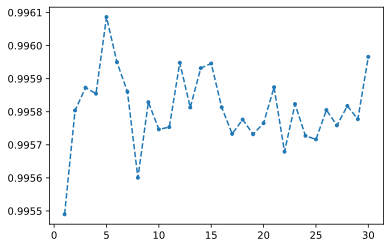

In [99]:
plt.plot(range(1,31), bayes_search.cv_results_['mean_test_score'], '.--')
plt.show()

In [100]:
bayes_search.best_score_

0.9960862390637644

In [101]:
bayes_search.best_params_

OrderedDict([('max_depth', 466), ('n_estimators', 487), ('n_jobs', 1457)])

In [102]:
# Bayes

model = bayes_search.best_estimator_

model.fit(X2_train, y_train)

# evaluate the model
pred = model.predict(X2_test)

# Print the name and gini importance of each feature
for feature in zip(X2_train.columns, model.feature_importances_):
    print(feature)

('WI_Rate', 0.8762995604476328)
('UZ_Tub_Pres', 0.009357324656364123)
('MZ_Tub_Pres', 0.0027238171234449508)
('LZ_Tub_Pres', 0.0034150639616722504)
('UCV_Position', 0.04251281250224991)
('MCV_Position', 0.022986258108863258)
('LCV_Position', 0.04270516319977285)


In [103]:
# Evaluate model predictions

model_score_train = model.score(X2_train, y_train)
model_score_test = model.score(X2_test, y_test)
model_mae = metrics.mean_absolute_error(y_test, pred)
model_mse = metrics.mean_squared_error(y_test, pred)
model_rmse = np.sqrt(metrics.mean_squared_error(y_test, pred))
print('Accuracy of train data:',model_score_train)
print('Accuracy of test data:',model_score_test)
print('Mean Absolute Error:',model_mae)  
print('Mean Squared Error:',model_mse)  
print('Root Mean Squared Error:',model_rmse)

Accuracy of train data: 0.9996194116453211
Accuracy of test data: 0.9990907775158994
Mean Absolute Error: 83.61576728871098
Mean Squared Error: 1039947.17332426
Root Mean Squared Error: 1019.7780019809508


In [105]:
BORF = OLS(y_test, add_constant(pred)).fit()
print('AIC:', BORF.aic)

AIC: 6713.871186812436


In [106]:
search_space = {'n_estimators': Integer(1, 2000),
                'max_depth': Integer(1, 2000),
              'n_jobs': Integer(1, 2000)}

bayes_search_ET = BayesSearchCV(ET, search_space, cv=3, n_jobs=-1, verbose=1, n_iter=30, random_state=0)

In [107]:
bayes_search_ET.fit(X2_train, y_train)

Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Fitting 3 folds for each of 1 candidates, totalling 3 fi

BayesSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_iter=30, n_jobs=-1,
              random_state=0,
              search_spaces={'max_depth': Integer(low=1, high=2000, prior='uniform', transform='normalize'),
                             'n_estimators': Integer(low=1, high=2000, prior='uniform', transform='normalize'),
                             'n_jobs': Integer(low=1, high=2000, prior='uniform', transform='normalize')},
              verbose=1)

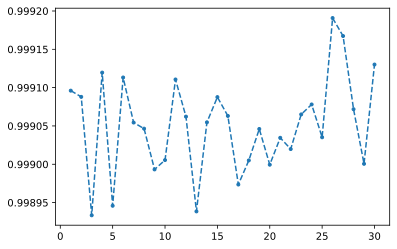

In [108]:
plt.plot(range(1,31), bayes_search_ET.cv_results_['mean_test_score'], '.--')
plt.show()

In [109]:
bayes_search_ET.best_score_

0.9991907786683164

In [110]:
bayes_search_ET.best_params_

OrderedDict([('max_depth', 1952), ('n_estimators', 61), ('n_jobs', 1396)])

In [112]:
# Bayes

model_ET = bayes_search_ET.best_estimator_

model_ET.fit(X2_train, y_train)

# evaluate the model
pred_ET = model_ET.predict(X2_test)

# Print the name and gini importance of each feature
for feature in zip(X2_train.columns, model_ET.feature_importances_):
    print(feature)

('WI_Rate', 0.8125449415996328)
('UZ_Tub_Pres', 0.013962654856220023)
('MZ_Tub_Pres', 0.017909708403409164)
('LZ_Tub_Pres', 0.016740147359786812)
('UCV_Position', 0.06748497649850527)
('MCV_Position', 0.022336346630122357)
('LCV_Position', 0.049021224652323635)


In [113]:
# Evaluate model predictions

model_ET_score_train = model_ET.score(X2_train, y_train)
model_ET_score_test = model_ET.score(X2_test, y_test)
model_ET_mae = metrics.mean_absolute_error(y_test, pred_ET)
model_ET_mse = metrics.mean_squared_error(y_test, pred_ET)
model_ET_rmse = np.sqrt(metrics.mean_squared_error(y_test, pred_ET))
print('Accuracy of train data:',model_ET_score_train)
print('Accuracy of test data:',model_ET_score_test)
print('Mean Absolute Error:',model_ET_mae)  
print('Mean Squared Error:',model_ET_mse)  
print('Root Mean Squared Error:',model_ET_rmse)

Accuracy of train data: 1.0
Accuracy of test data: 0.9988121338210929
Mean Absolute Error: 78.11596833503764
Mean Squared Error: 824231.3416857385
Root Mean Squared Error: 907.8718751485468


In [114]:
BOextra = OLS(y_test, add_constant(pred_ET)).fit()
print('AIC:', BOextra.aic)

AIC: 6607.419147655841


In [115]:
Predictions[['Predicted_RF_BO_UZ', 'Predicted_RF_BO_MZ', 'Predicted_RF_BO_LZ']] = pred
Predictions.head()

,WI_Rate,UZ_Ann_Pres,MZ_Ann_Pres,LZ_Ann_Pres,UZ_Tub_Pres,MZ_Tub_Pres,LZ_Tub_Pres,UZ_ICV_dP,MZ_ICV_dP,LZ_ICV_dP,...,Predicted_DT_LZ,Predicted_RFF_UZ,Predicted_RFF_MZ,Predicted_RFF_LZ,Predicted_ETF_UZ,Predicted_ETF_MZ,Predicted_ETF_LZ,Predicted_RF_BO_UZ,Predicted_RF_BO_MZ,Predicted_RF_BO_LZ
Date,,,,,,,,,,,,,,,,,,,,,
29/12/2016 12:00,3825.695557,6673.719238,7672.870605,6457.536133,7549.300293,7666.192383,7740.737793,875.580750,-6.677987,1283.201904,...,3216.770264,1195.671392,2293.817895,225.173918,456.045666,3365.119354,129.519363,1211.931838,2238.922867,158.526666
22/11/2016 16:00,13349.909180,7447.518555,8826.564453,6497.536621,8733.222656,8837.158203,8912.913086,1285.704102,10.593750,2415.376465,...,0.000000,0.000000,13383.577346,0.000000,0.000000,13335.526604,0.000000,0.000000,13367.445231,26.594414
14/12/2016 1:00,5647.179688,6297.257813,8735.780273,6524.355957,8626.978516,8737.755859,8811.809570,2329.720703,1.975586,2287.453613,...,0.000000,0.000000,5650.475459,0.000000,0.000000,5648.205166,0.000000,0.000000,5650.139766,0.000000
12/9/2016 17:00,0.000000,6285.435059,6393.759277,6471.579590,6292.383301,6397.249512,6474.816895,6.656913,3.320606,3.316755,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12/1/2017 23:00,0.000000,6698.252441,7791.966797,6547.348145,6356.360840,6465.707031,6543.325195,-341.891602,-1326.259766,-4.022949,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [116]:
Predictions[['Predicted_ET_BO_UZ', 'Predicted_ET_BO_MZ', 'Predicted_ET_BO_LZ']] = pred_ET
Predictions.head()

,WI_Rate,UZ_Ann_Pres,MZ_Ann_Pres,LZ_Ann_Pres,UZ_Tub_Pres,MZ_Tub_Pres,LZ_Tub_Pres,UZ_ICV_dP,MZ_ICV_dP,LZ_ICV_dP,...,Predicted_RFF_LZ,Predicted_ETF_UZ,Predicted_ETF_MZ,Predicted_ETF_LZ,Predicted_RF_BO_UZ,Predicted_RF_BO_MZ,Predicted_RF_BO_LZ,Predicted_ET_BO_UZ,Predicted_ET_BO_MZ,Predicted_ET_BO_LZ
Date,,,,,,,,,,,,,,,,,,,,,
29/12/2016 12:00,3825.695557,6673.719238,7672.870605,6457.536133,7549.300293,7666.192383,7740.737793,875.580750,-6.677987,1283.201904,...,225.173918,456.045666,3365.119354,129.519363,1211.931838,2238.922867,158.526666,247.305909,3660.719846,105.467878
22/11/2016 16:00,13349.909180,7447.518555,8826.564453,6497.536621,8733.222656,8837.158203,8912.913086,1285.704102,10.593750,2415.376465,...,0.000000,0.000000,13335.526604,0.000000,0.000000,13367.445231,26.594414,0.000000,13341.326719,0.000000
14/12/2016 1:00,5647.179688,6297.257813,8735.780273,6524.355957,8626.978516,8737.755859,8811.809570,2329.720703,1.975586,2287.453613,...,0.000000,0.000000,5648.205166,0.000000,0.000000,5650.139766,0.000000,0.000000,5648.618484,0.000000
12/9/2016 17:00,0.000000,6285.435059,6393.759277,6471.579590,6292.383301,6397.249512,6474.816895,6.656913,3.320606,3.316755,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
12/1/2017 23:00,0.000000,6698.252441,7791.966797,6547.348145,6356.360840,6465.707031,6543.325195,-341.891602,-1326.259766,-4.022949,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [117]:
Predictions = pd.DataFrame(Predictions)

In [118]:
Predictions.to_csv('Predictions_final.csv')

<AxesSubplot:xlabel='Predicted_ETF_UZ', ylabel='Density'>

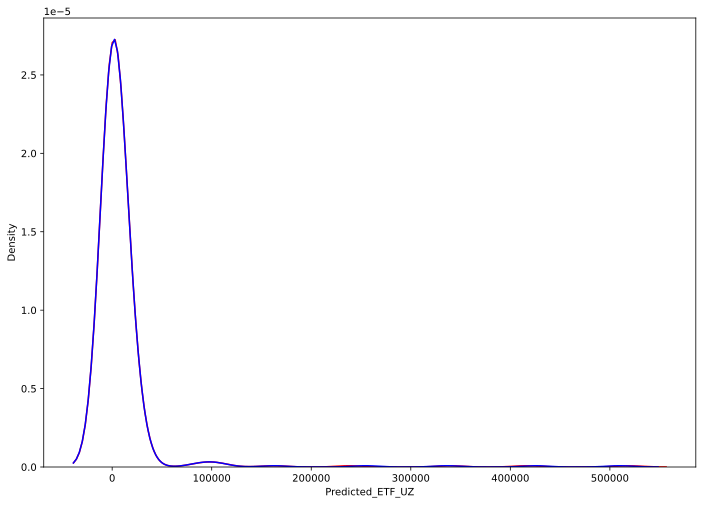

In [119]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

ax1 = sns.distplot(Predictions['Norm_Uzonal_Rate'], hist=False, color="r", label="Actual")

sns.distplot(Predictions['Predicted_ETF_UZ'], hist=False, color="b", label="Predicted UZonal Rates", ax=ax1)

<AxesSubplot:xlabel='Predicted_ETF_MZ', ylabel='Density'>

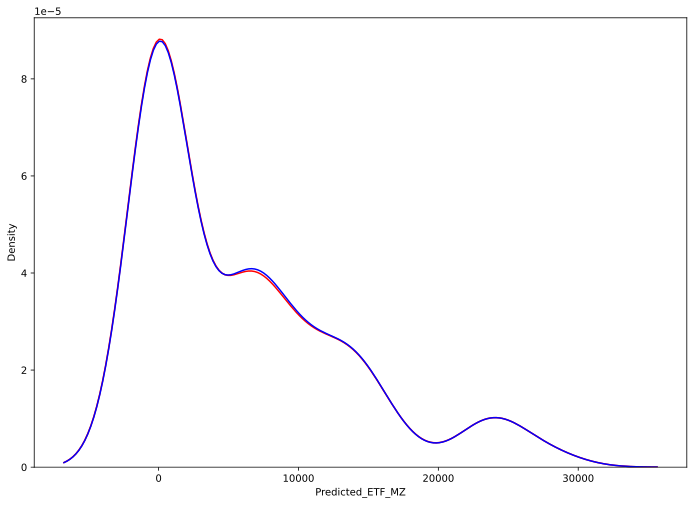

In [120]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

ax1 = sns.distplot(Predictions['Norm_Mzonal_Rate'], hist=False, color="r", label="Actual")

sns.distplot(Predictions['Predicted_ETF_MZ'], hist=False, color="b", label="Predicted MZonal Rates", ax=ax1)

<AxesSubplot:xlabel='Predicted_ETF_LZ', ylabel='Density'>

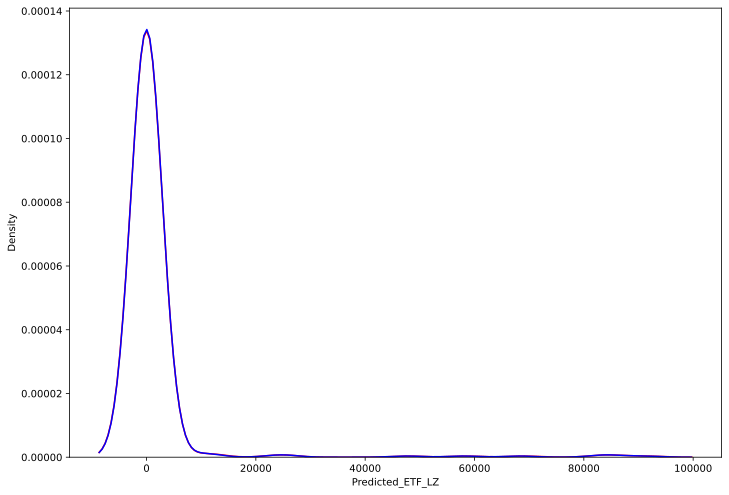

In [121]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

ax1 = sns.distplot(Predictions['Norm_Lzonal_Rate'], hist=False, color="r", label="Actual")

sns.distplot(Predictions['Predicted_ETF_LZ'], hist=False, color="b", label="Predicted LZonal Rates", ax=ax1)

<AxesSubplot:xlabel='Predicted_RFF_UZ', ylabel='Density'>

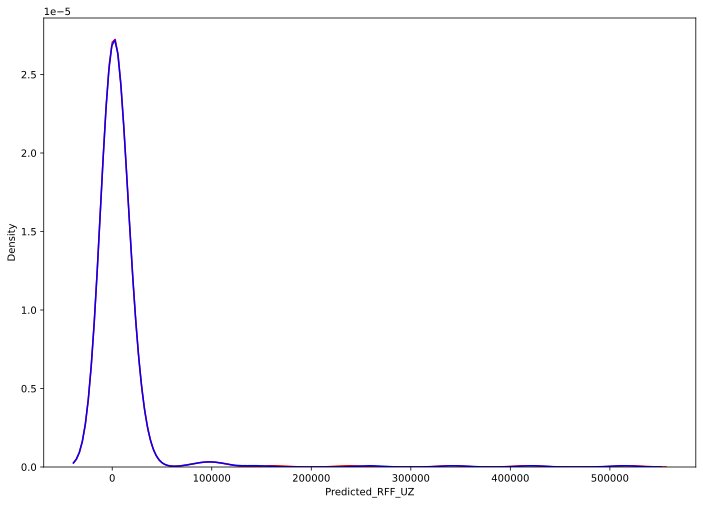

In [122]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

ax1 = sns.distplot(Predictions['Norm_Uzonal_Rate'], hist=False, color="r", label="Actual")

sns.distplot(Predictions['Predicted_RFF_UZ'], hist=False, color="b", label="Predicted UZonal Rates", ax=ax1)

<AxesSubplot:xlabel='Predicted_RFF_MZ', ylabel='Density'>

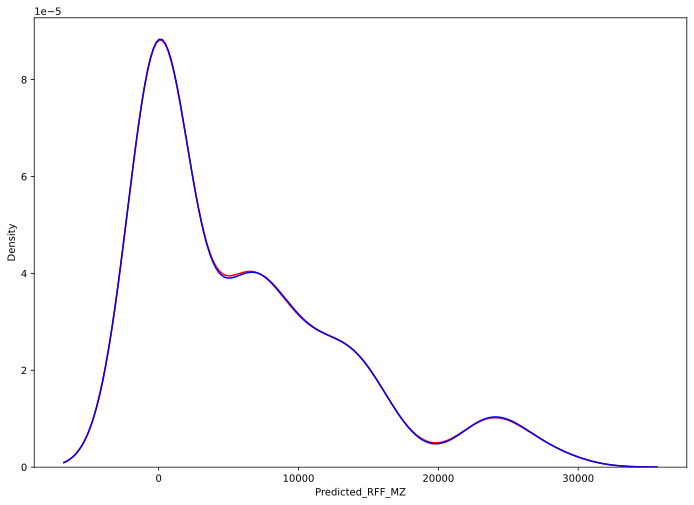

In [123]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

ax1 = sns.distplot(Predictions['Norm_Mzonal_Rate'], hist=False, color="r", label="Actual")

sns.distplot(Predictions['Predicted_RFF_MZ'], hist=False, color="b", label="Predicted MZonal Rates", ax=ax1)

<AxesSubplot:xlabel='Predicted_RFF_LZ', ylabel='Density'>

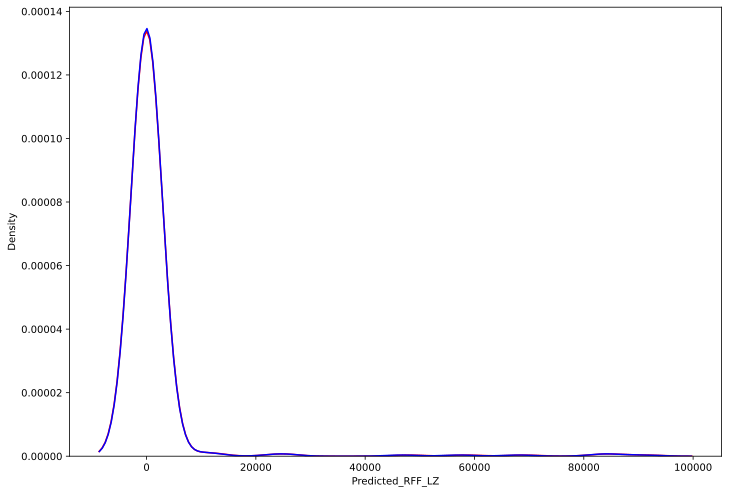

In [124]:
fig, ax = plt.subplots()
# the size of A4 paper
fig.set_size_inches(11.7, 8.27)

ax1 = sns.distplot(Predictions['Norm_Lzonal_Rate'], hist=False, color="r", label="Actual")

sns.distplot(Predictions['Predicted_RFF_LZ'], hist=False, color="b", label="Predicted LZonal Rates", ax=ax1)

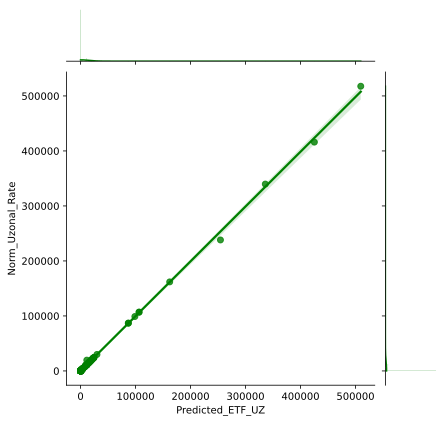

In [125]:
fig= sns.jointplot(x='Predicted_ETF_UZ',y='Norm_Uzonal_Rate',data=Predictions,kind='reg', color='g')
#plt.gca().set(ylim=(0,80000), xlim=(0,80000))

# save the heatmap as a file
#fig.savefig("Jointplot of Deep Ensemble Super Learner Regressor.jpg",
#            format='jpeg',
#            dpi=100,
#            bbox_inches='tight')

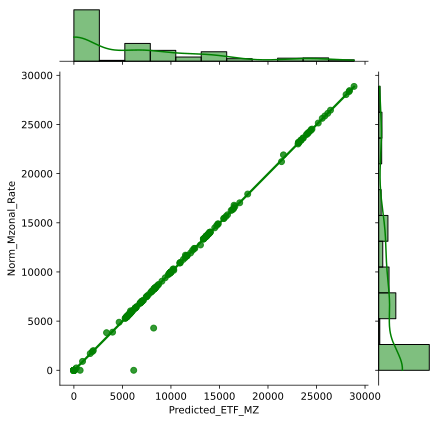

In [126]:
fig= sns.jointplot(x='Predicted_ETF_MZ',y='Norm_Mzonal_Rate',data=Predictions,kind='reg', color='g')
#plt.gca().set(ylim=(0,80000), xlim=(0,80000))

# save the heatmap as a file
#fig.savefig("Jointplot of Deep Ensemble Super Learner Regressor.jpg",
#            format='jpeg',
#            dpi=100,
#            bbox_inches='tight')

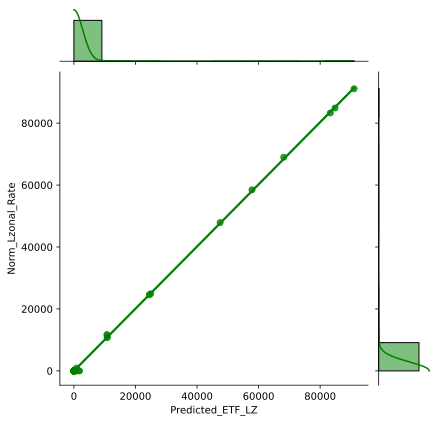

In [127]:
fig= sns.jointplot(x='Predicted_ETF_LZ',y='Norm_Lzonal_Rate',data=Predictions,kind='reg', color='g')
#plt.gca().set(ylim=(0,80000), xlim=(0,80000))

# save the heatmap as a file
#fig.savefig("Jointplot of Deep Ensemble Super Learner Regressor.jpg",
#            format='jpeg',
#            dpi=100,
#            bbox_inches='tight')

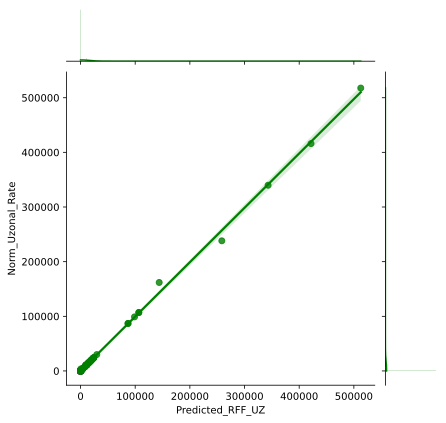

In [128]:
fig= sns.jointplot(x='Predicted_RFF_UZ',y='Norm_Uzonal_Rate',data=Predictions,kind='reg', color='g')
#plt.gca().set(ylim=(0,80000), xlim=(0,80000))

# save the heatmap as a file
#fig.savefig("Jointplot of Deep Ensemble Super Learner Regressor.jpg",
#            format='jpeg',
#            dpi=100,
#            bbox_inches='tight')

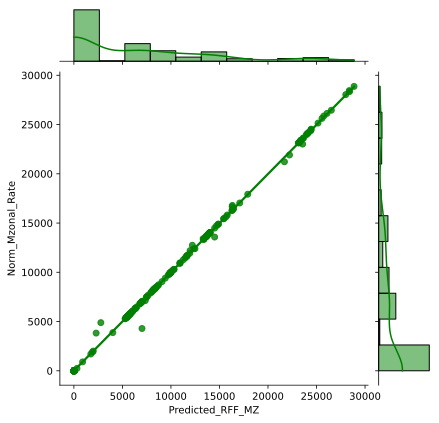

In [129]:
fig= sns.jointplot(x='Predicted_RFF_MZ',y='Norm_Mzonal_Rate',data=Predictions,kind='reg', color='g')
#plt.gca().set(ylim=(0,80000), xlim=(0,80000))

# save the heatmap as a file
#fig.savefig("Jointplot of Deep Ensemble Super Learner Regressor.jpg",
#            format='jpeg',
#            dpi=100,
#            bbox_inches='tight')

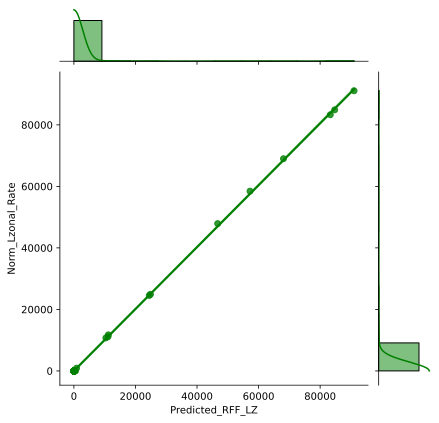

In [130]:
fig= sns.jointplot(x='Predicted_RFF_LZ',y='Norm_Lzonal_Rate',data=Predictions,kind='reg', color='g')
#plt.gca().set(ylim=(0,80000), xlim=(0,80000))

# save the heatmap as a file
#fig.savefig("Jointplot of Deep Ensemble Super Learner Regressor.jpg",
#            format='jpeg',
#            dpi=100,
#            bbox_inches='tight')

## RETRAIN MODEL WITH ALL DATA

In [131]:
df = pd.read_csv(r"H:\Desktop\Publications\Research\Smart well injection\Trial_1.csv")
df.head()

,Date,WI_Rate,UZ_Ann_Pres,MZ_Ann_Pres,LZ_Ann_Pres,UZ_Tub_Pres,MZ_Tub_Pres,LZ_Tub_Pres,UZ_ICV_dP,MZ_ICV_dP,...,MCV_Position,LCV_Position,Annulus_Temp,THT,Annulus_Pressure,THP,Tubing_Dp,Norm_Uzonal_Rate,Norm_Mzonal_Rate,Norm_Lzonal_Rate
0,1/8/2016 0:00,84797.63281,6346.441895,6415.320801,6468.405762,6346.523926,6450.257324,6529.002441,-0.220879,35.166286,...,0,5,3.831591,3.888920,5892.671429,2376.399882,3516.271547,0.0,0.0,84797.63281
1,1/8/2016 1:00,84880.31250,6346.474121,6415.352539,6468.445313,6346.555176,6450.287598,6529.039551,-0.219371,35.176537,...,0,5,3.946249,3.946249,5909.583735,2383.830180,3525.753555,0.0,0.0,84880.31250
2,1/8/2016 2:00,84804.59375,6346.500977,6415.385254,6468.471680,6346.579590,6450.314941,6529.063477,-0.216536,35.172592,...,0,5,3.946249,4.003609,5919.674540,2392.431272,3527.243268,0.0,0.0,84804.59375
3,1/8/2016 3:00,84728.88281,6346.516113,6415.399902,6468.486328,6346.592285,6450.331543,6529.080566,-0.219699,35.171467,...,0,5,4.003609,4.060938,5932.487370,2400.584895,3531.902476,0.0,0.0,84728.88281
4,1/8/2016 4:00,84653.16406,6346.517578,6415.424805,6468.489746,6346.592773,6450.338379,6529.084473,-0.218044,35.167641,...,0,5,4.060938,4.118267,5940.982933,2410.476247,3530.506686,0.0,0.0,84653.16406


In [135]:
X = df[["WI_Rate", "UZ_Tub_Pres", "MZ_Tub_Pres", "LZ_Tub_Pres", "UCV_Position", "MCV_Position", "LCV_Position"]]
y = df[["Norm_Uzonal_Rate", "Norm_Mzonal_Rate", "Norm_Lzonal_Rate"]]

In [136]:
# Extra Tree Regression
Final = ExtraTreesRegressor()
Final.fit(X, y)

# evaluate the model
yFinal = Final.predict(X)

In [137]:
df[['Predicted_UZ', 'Predicted_MZ', 'Predicted_LZ']] = yFinal
df.head()

,Date,WI_Rate,UZ_Ann_Pres,MZ_Ann_Pres,LZ_Ann_Pres,UZ_Tub_Pres,MZ_Tub_Pres,LZ_Tub_Pres,UZ_ICV_dP,MZ_ICV_dP,...,THT,Annulus_Pressure,THP,Tubing_Dp,Norm_Uzonal_Rate,Norm_Mzonal_Rate,Norm_Lzonal_Rate,Predicted_UZ,Predicted_MZ,Predicted_LZ
0,1/8/2016 0:00,84797.63281,6346.441895,6415.320801,6468.405762,6346.523926,6450.257324,6529.002441,-0.220879,35.166286,...,3.888920,5892.671429,2376.399882,3516.271547,0.0,0.0,84797.63281,0.0,0.0,84797.63281
1,1/8/2016 1:00,84880.31250,6346.474121,6415.352539,6468.445313,6346.555176,6450.287598,6529.039551,-0.219371,35.176537,...,3.946249,5909.583735,2383.830180,3525.753555,0.0,0.0,84880.31250,0.0,0.0,84880.31250
2,1/8/2016 2:00,84804.59375,6346.500977,6415.385254,6468.471680,6346.579590,6450.314941,6529.063477,-0.216536,35.172592,...,4.003609,5919.674540,2392.431272,3527.243268,0.0,0.0,84804.59375,0.0,0.0,84804.59375
3,1/8/2016 3:00,84728.88281,6346.516113,6415.399902,6468.486328,6346.592285,6450.331543,6529.080566,-0.219699,35.171467,...,4.060938,5932.487370,2400.584895,3531.902476,0.0,0.0,84728.88281,0.0,0.0,84728.88281
4,1/8/2016 4:00,84653.16406,6346.517578,6415.424805,6468.489746,6346.592773,6450.338379,6529.084473,-0.218044,35.167641,...,4.118267,5940.982933,2410.476247,3530.506686,0.0,0.0,84653.16406,0.0,0.0,84653.16406


In [138]:
Final_pred = pd.DataFrame(df)

In [139]:
Final_pred.to_csv('WI_pred.csv')

In [142]:
from sklearn import model_selection
import joblib
import pickle

In [141]:
# save the model to disk
filename = 'finalized_model.sav'
pickle.dump(Final, open(filename, 'wb'))
 
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
result = loaded_model.score(X2_test, y_test)
print(result)

1.0


In [143]:
# save the model to disk
filename = 'ICV.sav'
joblib.dump(Final, filename)

['ICV.sav']

In [144]:
# create an iterator object with write permission - model.pkl
with open('ICV_pkl', 'wb') as files:
    pickle.dump(Final, files)

In [145]:
# load the model from disk
filename = 'ICV.sav'
WI_model = joblib.load(filename)

## another way to load

In [146]:
# load saved model
with open('ICV_pkl' , 'rb') as f:
    Extra = pickle.load(f)

In [149]:
pp = Extra.predict(X2_train)

In [150]:
pp

array([[   0.      ,    0.      ,    0.      ],
       [   0.      ,    0.      ,    0.      ],
       [   0.      ,    0.      ,    0.      ],
       ...,
       [   0.      ,    0.      ,    0.      ],
       [   0.      , 8630.417969,    0.      ],
       [   0.      , 6506.675781,    0.      ]])

## Due to the stochastic nature of the models some gave out varying results when run multiple times. As such, the mean of 10 prediction runs were used in the publication